In [1]:
import numpy as np
import pandas as pd
import matplotlib
import string
import nltk

#read the training data
df = pd.read_csv('../training/DataSeer-NLP_Deliverable_500_Combined-xlsx.csv', encoding = "UTF-8")

df.sample(4)

,Journal,Article #,Manuscript ID or DOI,Data type,dataset number,Data subtype,Data type: subtype,Section,Subsection title,Page number,Column number,Data paragraph,Data Keyword,Data action word,Specialist equipment,Confidence (0-10),Notes
2680,PLOS ONE,381,https://doi.org/10.1371/journal.pone.0208070,Generic,5.0,Subject data table,Generic: Subject data table,Materials and methods,Measurement of upper and lower limb muscle act...,4.0,1.0,"Additionally,\nthe timing of the heel contact,...",timing,was recorded,Pressure sensor (DL-250),NaN,NaN
1194,PLOS ONE,290,https://doi.org/10.1371/journal.pone.0207177,Generic,2.0,NaN,Generic:,Materials and methods,Pattern based comparisons,8.0,1.0,Ten different symptoms\nwould thus in theory l...,unique patterns,are observed,NaN,NaN,NaN
2002,PLOS ONE,208,https://doi.org/10.1371/journal.pone.0207944,Generic,3.0,Electrophoresis Assay,Generic: Electrophoresis Assay,Materials and methods,"Sample collection, DNA extraction, and genotyping",5.0,1.0,The\nquality of the extracted DNA was examined...,DNA,was examined,NaN,NaN,NaN
1148,PLOS ONE,282,https://doi.org/10.1371/journal.pone.0206980,Generic,7.0,NaN,Generic:,Materials and methods,Peripheral blood and bone marrow,4.0,1.0,BM aspiration and core\nbiopsy was also perfor...,BM aspiration,was also performed,NaN,NaN,NaN


In [2]:
# check and remove rows with empty text
nb1 = df.shape[0]
df['Data paragraph'].replace('', np.nan, inplace=True)

In [3]:
nb1 = df.shape[0]
df.dropna(subset=['Data paragraph'], inplace=True)
nb2 = df.shape[0]
print(nb1-nb2,"rows with empty paragraph text have been removed")
# df.reset_index(drop=True,inplace=True)

35 rows with empty paragraph text have been removed


In [4]:
# cleaning data types
df = df.astype({"Data type": str})
df = df.astype({"Data subtype": str})
df = df.astype({"Data type: subtype": str})

def clean_fields(row):
    row["Data type"] = row["Data type"].strip()
    row["Data subtype"] = row["Data subtype"].strip()
    row["Data type: subtype"] = row["Data type: subtype"].strip()
    return row

df = df.apply(clean_fields, axis=1)

datatypes = df['Data type'].value_counts()
print(len(datatypes), "distinct data types")

62 distinct data types


In [5]:
datatypes.head(10)

Generic                2443
Existing dataset        158
Spectrometry data       128
Microscopy data         117
DNA sequence data        93
Image                    57
PCR data                 32
ELISA                    29
Flow cytometry data      28
ECG data                 27
Name: Data type, dtype: int64

In [6]:
datatypes.describe()

count      62.000000
mean       54.403226
std       309.889798
min         1.000000
25%         1.000000
50%         4.000000
75%        12.750000
max      2443.000000
Name: Data type, dtype: float64

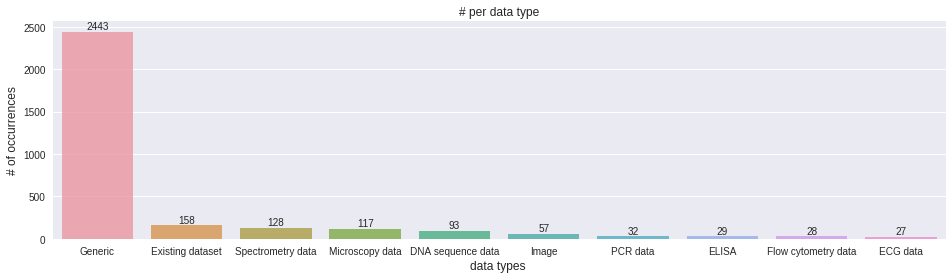

In [19]:
# just to visualize the basic distribution

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

x = datatypes.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

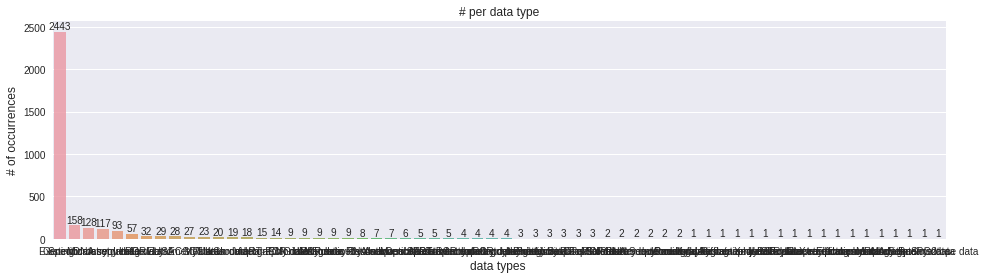

In [8]:
plt.close()

x = datatypes
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [9]:
datasubtypes = df['Data subtype'].value_counts()
print(len(datasubtypes), "distinct data subtypes")

52 distinct data subtypes


In [10]:
datasubtypes.head(10)

nan                   2086
Subject data table     718
Sample table           169
Assay                  155
Review                  34
Alignment               29
Fluorescence data       27
Image                   23
Western blot            18
Photograph              15
Name: Data subtype, dtype: int64

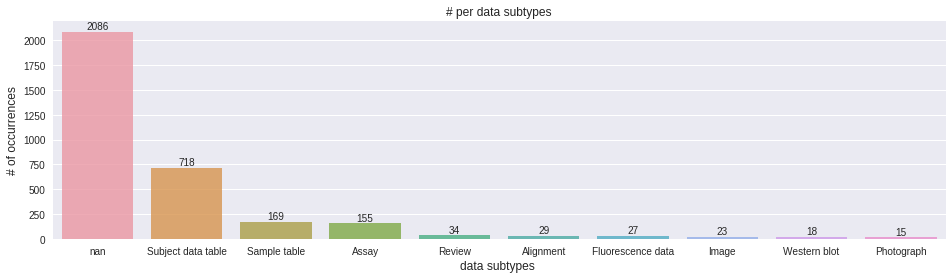

In [11]:
# just to visualize the basic distribution
x = datasubtypes.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data subtypes")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data subtypes ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
sections = df['Section'].value_counts()
print(len(sections), "distinct section titles")

48 distinct section titles


In [13]:
sections.head(10)

Materials and methods    1839
Methods                   677
Material and methods      250
Materials and Methods     183
Method                     63
Patients and methods       38
Methodology                36
Methods and materials      35
Materials & methods        33
Subjects and methods       26
Name: Section, dtype: int64

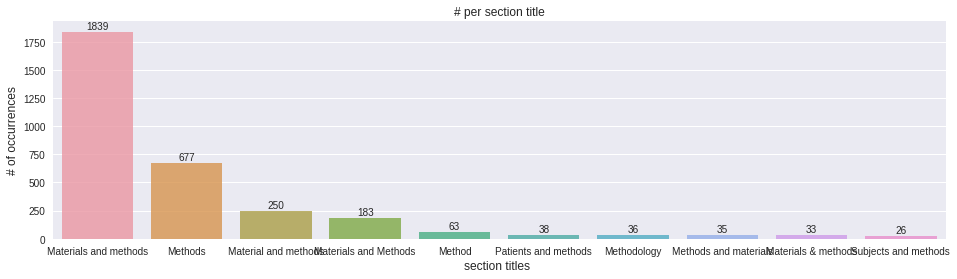

In [14]:
# just to visualize the basic distribution
x = sections.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per section title")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('section titles ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [15]:
print("Variations in the length of the texts")
lens = df['Data paragraph'].str.len()
print('mean:', lens.mean(), 'std:', lens.std(), 'max:', lens.max())

Variations in the length of the texts
mean: 182.46575748591758 std: 102.55516597666966 max: 1602


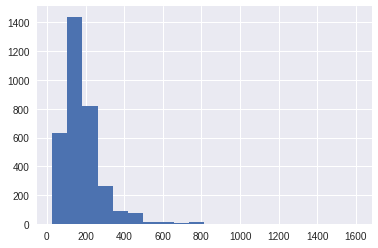

In [16]:
lens.hist(bins=20)

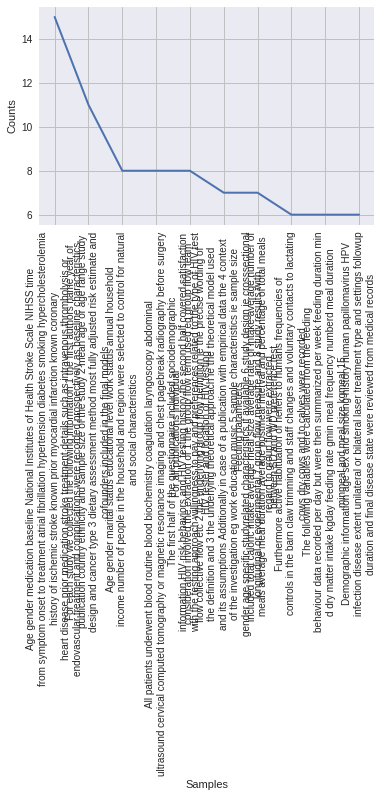

In [17]:
# text duplicates
all_texts = df['Data paragraph']
all_texts = [str(x) for x in all_texts]
sentences = [''.join(c for c in s if c not in string.punctuation) for s in all_texts]
frequency = nltk.FreqDist(sentences)
frequency.plot(10, cumulative = False)

In [18]:
duplicates =0
for key in frequency:
    if frequency[key] > 1:
        duplicates += 1
print(duplicates,"duplicated texts")

295 duplicated texts
